# Exploration dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
relative_path = 'raw_data/crowd2020-2023.csv'
df = pd.read_csv('/Users/thomas_metral/code/thomas-metral/metro_seoul/raw_data/crowd2020-2023.csv')
#convert line number to int
df['line'] = df['line'].astype(int)


/var/folders/zn/b4l6fdhd4fs52t3wxt1d7kn40000gn/T/ipykernel_36407/2672914768.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/thomas_metral/code/thomas-metral/metro_seoul/raw_data/crowd2020-2023.csv')


### Focusing on line 8

In [3]:
# Keeping only line 8
data_8 = df[df['line'] == 8]

#station number of type object : convert to int
data_8['station_number'] = data_8['station_number'].astype(int)


/var/folders/zn/b4l6fdhd4fs52t3wxt1d7kn40000gn/T/ipykernel_36407/531184325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_8['station_number'] = data_8['station_number'].astype(int)


In [4]:
data_8.reset_index(inplace=True, drop=True)


In [5]:
# no need to keep useless info
data_8.drop(columns=['Unnamed: 0', 'line'], inplace=True)


/var/folders/zn/b4l6fdhd4fs52t3wxt1d7kn40000gn/T/ipykernel_36407/2817455871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_8.drop(columns=['Unnamed: 0', 'line'], inplace=True)


In [6]:
#Setting date as an index
data_8 = data_8.set_index('date')


In [7]:
data_8.sample(10)


,station_number,station_name,entry/exit,06,06-07,07-08,08-09,09-10,10-11,11-12,...,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,24
date,,,,,,,,,,,,,,,,,,,,,
2023-03-06,2828,Namwirye,entry,50,258,922,1047,542,285,226,...,439,429,608,794,296,244,229,169,52,17.0
2020-05-31,2823,남한산성입구(성남법원.검찰청),exit,30,80,102,151,273,329,206,...,333,389,366,490,404,407,492,453,218,46.0
2020-07-24,2812,Cheonho(Pungnaptoseong),exit,66,309,630,1308,894,598,626,...,1029,1162,1763,3074,2470,1141,931,870,628,128.0
2021-05-10,2815,Jamsil(Songpa-gu Office),entry,54,159,343,556,329,312,384,...,698,780,1292,2335,1197,918,903,710,86,12467.0
2020-05-25,2824,Dandaeogeori,exit,84,220,486,788,357,302,279,...,470,628,672,1331,1156,716,578,457,280,38.0
2020-07-31,2812,Cheonho(Pungnaptoseong),exit,73,361,614,1154,912,588,662,...,959,1204,1658,3007,2163,1096,935,869,624,116.0
2022-10-15,2823,남한산성입구(성남법원.검찰청),exit,50,129,235,316,369,413,432,...,532,687,792,823,709,603,703,590,471,89.0
2020-11-03,2825,Sinheung,exit,30,120,120,267,154,173,163,...,296,301,386,651,485,326,249,215,122,21.0
2020-05-14,2811,Amsa,entry,476,942,3260,4360,1870,869,665,...,538,657,751,846,497,340,264,233,71,3.0


In [8]:
#splitting entry and exit

entry = data_8[data_8['entry/exit'] == 'entry']
exit = data_8[data_8['entry/exit'] == 'exit']


## Entries vs exit


In [9]:
#ENTRIES
#groub by station number and sum
entry = entry.groupby(by='station_number').sum().reset_index()
entry


,station_number,station_name,entry/exit,06,06-07,07-08,08-09,09-10,10-11,11-12,...,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-24,24
0,2811,AmsaAmsaAmsaAmsaAmsaAmsaAmsaAmsaAmsaAmsaAmsaAm...,entryentryentryentryentryentryentryentryentrye...,577233,1069166,3130720,4098631,2002967,1091114,937122,...,768604,826283,880570,910491,527468,409362,327992,224429,80497,5687273.0
1,2812,Cheonho(Pungnaptoseong)Cheonho(Pungnaptoseong)...,entryentryentryentryentryentryentryentryentrye...,441461,675014,1628194,2285943,1314979,764594,732535,...,841347,942218,1137355,1226965,807836,712788,574330,413918,158771,4653415.0
2,2813,Gangdong-gu OfficeGangdong-gu OfficeGangdong-g...,entryentryentryentryentryentryentryentryentrye...,195919,438078,1210461,1626429,912715,570284,513525,...,520342,588285,734704,1080217,423108,304813,277249,190322,62672,3094983.0
3,2814,Mongchontoseong(World Peace Gate)Mongchontoseo...,entryentryentryentryentryentryentryentryentrye...,60135,142702,418436,637294,387317,268702,270762,...,377352,498614,624964,859825,375078,280337,286182,210522,87694,1849197.0
4,2815,Jamsil(Songpa-gu Office)Jamsil(Songpa-gu Offic...,entryentryentryentryentryentryentryentryentrye...,54898,168971,347426,523776,394258,376527,485190,...,1103116,1284240,1748590,2559181,1485017,1381543,1306058,896143,262959,4389664.0
5,2816,SeokchonSeokchonSeokchonSeokchonSeokchonSeokch...,entryentryentryentryentryentryentryentryentrye...,120381,223232,621778,928923,528877,384753,383979,...,463873,522084,641137,773497,443914,379540,404479,312655,105331,2361791.0
6,2817,SongpaSongpaSongpaSongpaSongpaSongpaSongpaSong...,entryentryentryentryentryentryentryentryentrye...,110186,339620,1052812,1289792,721750,503872,471098,...,499812,567208,553373,648633,344044,246213,197647,145176,52778,2304359.0
7,2818,Garak MarketGarak MarketGarak MarketGarak Mark...,entryentryentryentryentryentryentryentryentrye...,113497,212431,406780,514685,387636,381352,404970,...,545312,558280,739910,1117308,483039,421163,445864,327794,125492,2338050.0
8,2819,MunjeongMunjeongMunjeongMunjeongMunjeongMunjeo...,entryentryentryentryentryentryentryentryentrye...,88679,258866,865423,1230990,743225,586867,633483,...,1046029,1213654,2875071,4933723,1737539,1117825,1026440,708113,201261,6119900.0
9,2820,JangjiJangjiJangjiJangjiJangjiJangjiJangjiJang...,entryentryentryentryentryentryentryentryentrye...,219622,668383,1818213,2196600,1190038,766875,696887,...,920240,1183890,1604675,1942209,1071355,906581,771400,484195,148293,5215677.0


In [10]:
entries = entry.drop(columns=['station_number', 'station_name', 'entry/exit'])


In [11]:
#EXITS

exit = exit.groupby(by='station_number').sum().reset_index()
exits = exit.drop(columns=['station_number', 'station_name', 'entry/exit'])


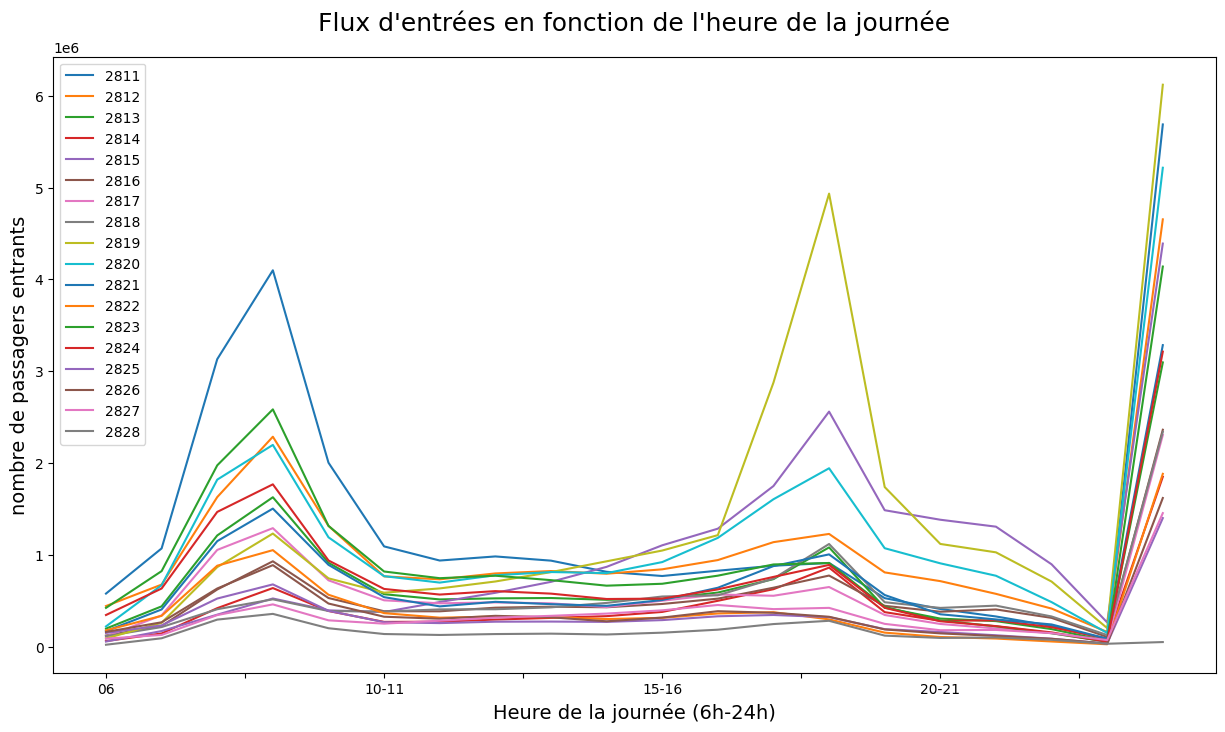

In [12]:
#Plotting entries
rows_entry = [entries.iloc[i] for i in entries.index]

plt.figure(figsize=(15,8))
plt.title('''Flux d'entrées en fonction de l'heure de la journée''', fontsize = 18, y = 1.03)
plt.ylabel('nombre de passagers entrants', fontsize = 14)
plt.xlabel('Heure de la journée (6h-24h)', fontsize = 14)

for i in entries.index:
    rows_entry[i].plot(kind='line', label=entry['station_number'].iloc[i])
    plt.legend()


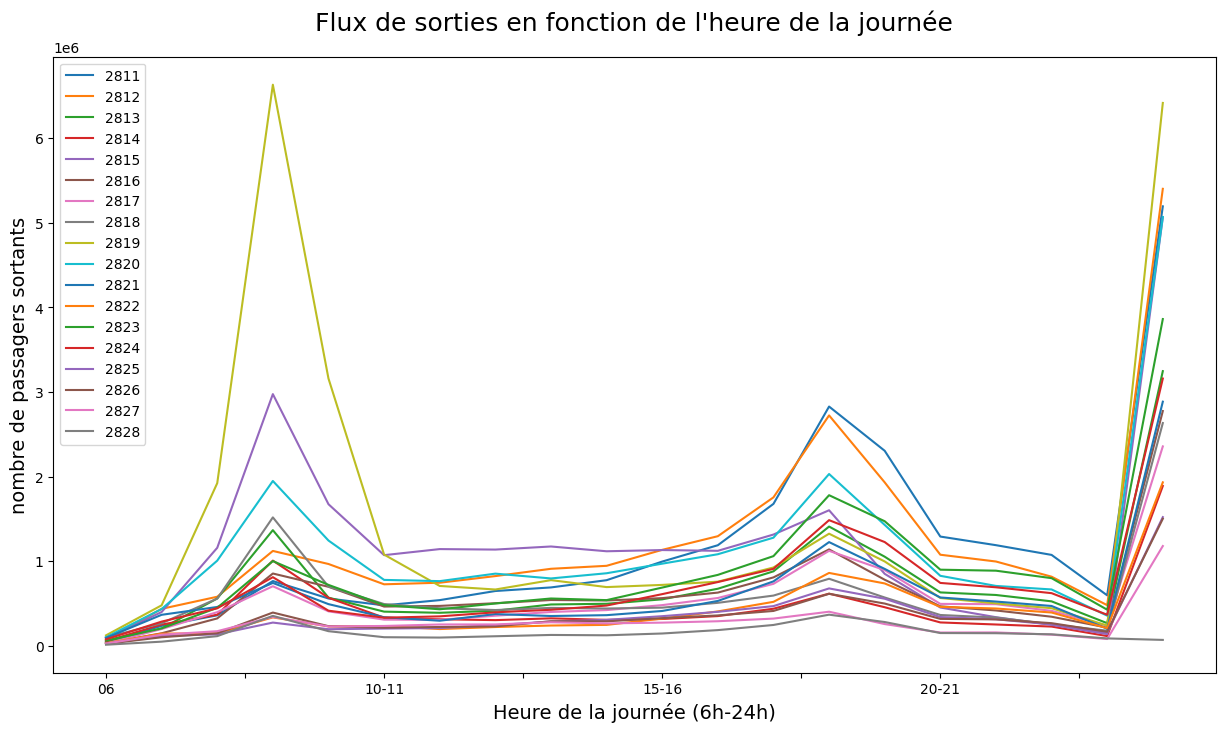

In [13]:
#Plotting exits

rows_exit = [exits.iloc[i] for i in exits.index]

plt.figure(figsize=(15,8))
plt.title('''Flux de sorties en fonction de l'heure de la journée''', fontsize = 18, y = 1.03)
plt.ylabel('nombre de passagers sortants', fontsize = 14)
plt.xlabel('Heure de la journée (6h-24h)', fontsize = 14)

for i in exits.index:
    rows_exit[i].plot(kind='line', label=exit['station_number'].iloc[i])
    plt.legend()


## Entries vs. exit per station of the line 8

In [14]:
#groupping by station number with
data_8_sum = data_8.groupby(by='station_number').sum().reset_index()


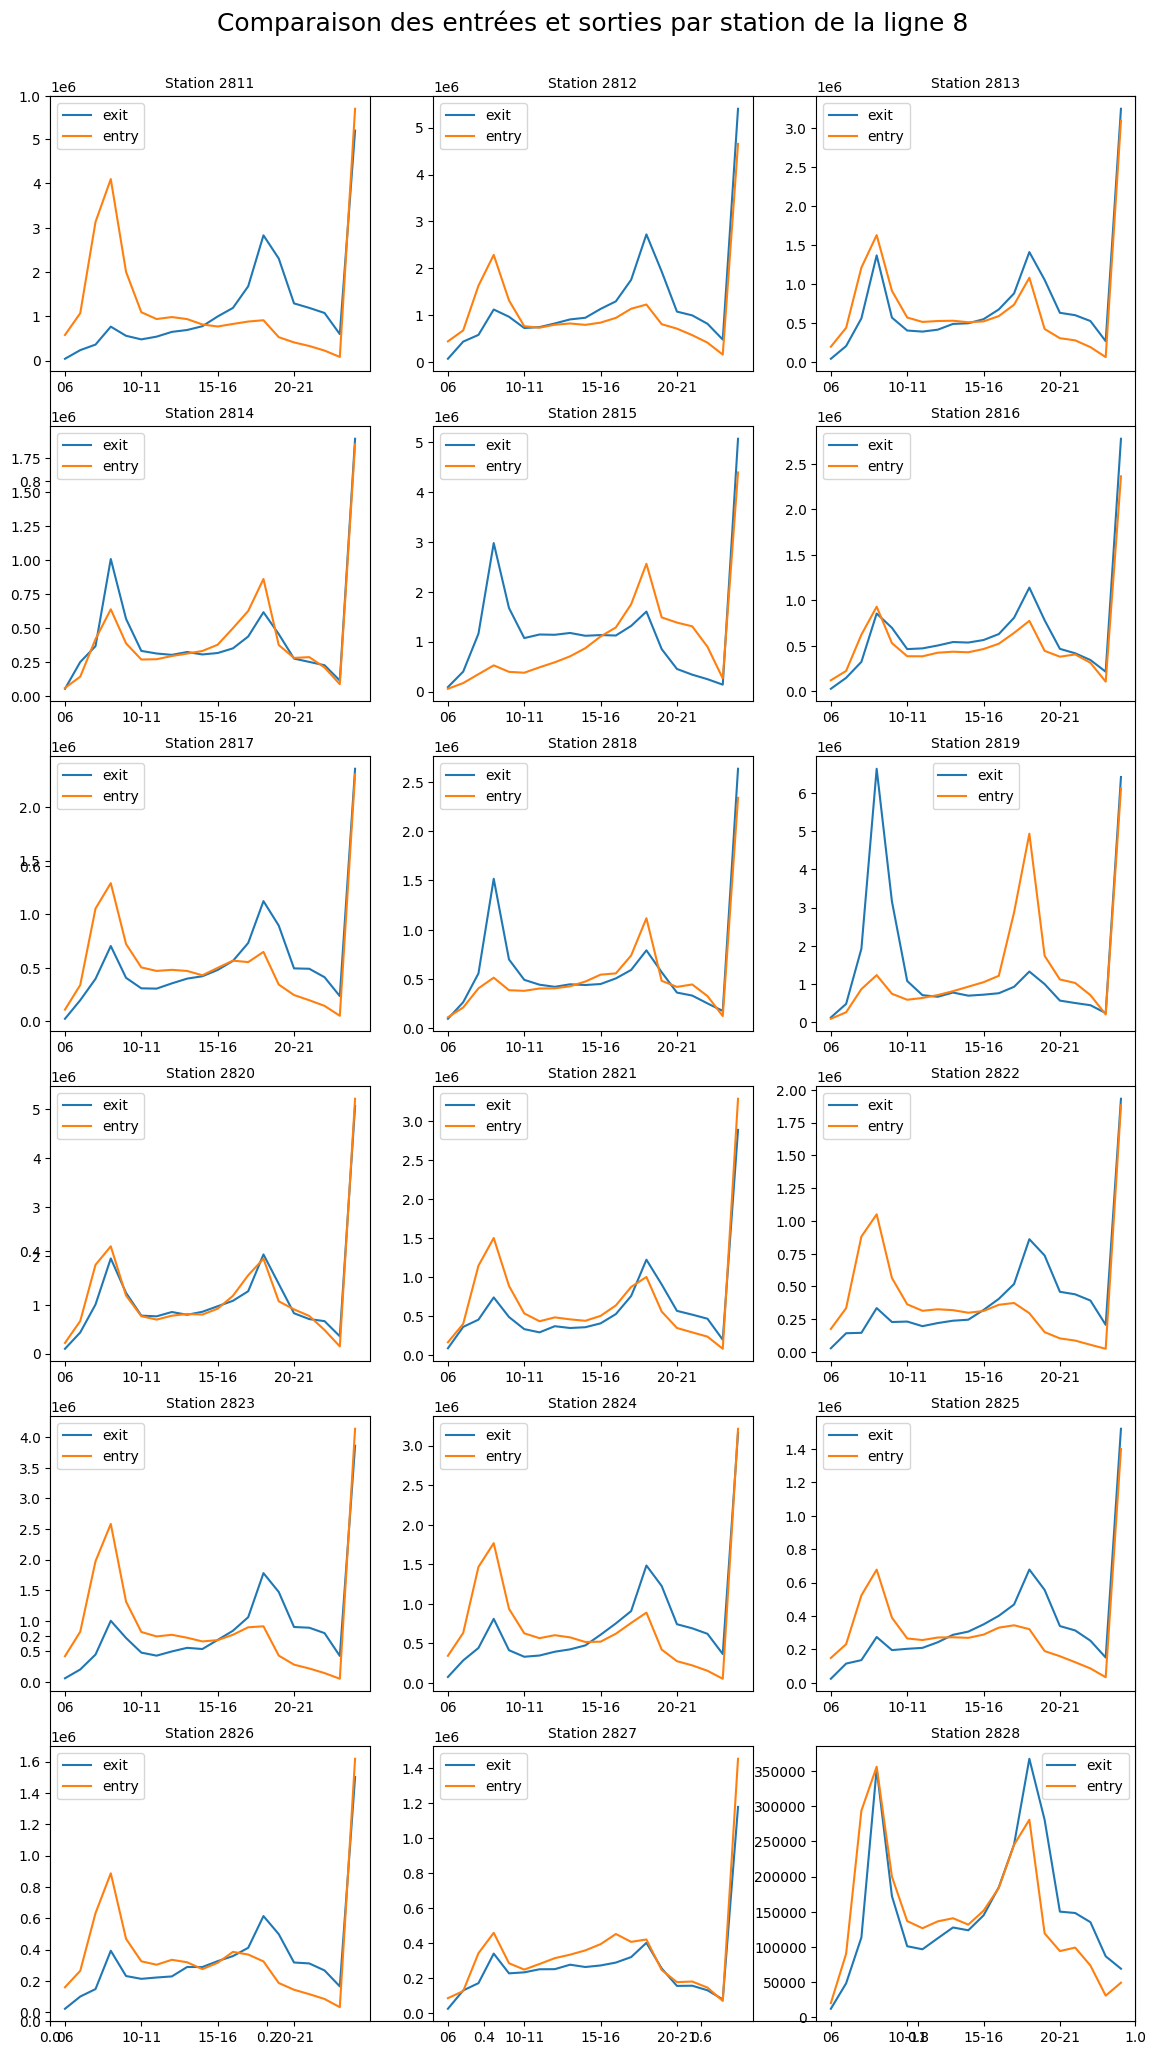

In [15]:
plt.figure(figsize=(14,25))
plt.title('''Comparaison des entrées et sorties par station de la ligne 8''', fontsize = 18, y = 1.03)

for i in exits.index:
    plt.subplot(6, 3, i+1)
    plt.title(f'''Station {exit['station_number'].iloc[i]}''', fontsize = 10)
    rows_exit[i].plot(kind = 'line', label='exit')
    rows_entry[i].plot(kind='line', label='entry')
    plt.legend()
